<a href="https://colab.research.google.com/github/littarizkiA/BeginnerAnalyst/blob/main/Fictional_Beginner_Retail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This will be my first practice on my journey to become a Data Analyst. since the beginning of October 2021, I started to learn how python works and how it will help me through my data-driven decision-making activity. 

I hope everyone who sees this will also be my mentor on how I should interpret my data better.

The purpose of this data below is mostly to study customers' behavior on 3 brands that spread in a different supermarket and what's the least suggestion I could give from the findings.

P.s: the data is purely fictional. :

**IMPORTING PACKAGES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**IMPORTING THE DATA**

In [2]:
data = pd.read_csv('/content/CampaignDuplicate.csv')
data.head()

,Order date,Product Brand,Product number,Customer ID,Order ID,Supermarket purchased from,Sales Volume,Sales Value
0,9/1/2016,Competitor A,701139,9442,R1234623,Supermarket South,1,$34.50
1,9/1/2016,Competitor B,198485,54276,R1235251,Supermarket West,3,$34.20
2,9/1/2016,Competitor B,768644,244012,R1235150,Supermarket West,1,$61.30
3,9/1/2016,Competitor B,369239,300346,R1235378,Supermarket North-East,1,$39.80
4,9/1/2016,Colgate-Palmolive,899488,436689,R1234583,Supermarket North,1,$37.20


**LET'S START THE EDA**

first things first, let's check the data type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Order date                  1226 non-null   object
 1   Product Brand               1226 non-null   object
 2   Product number              1226 non-null   int64 
 3   Customer ID                 1226 non-null   int64 
 4   Order ID                    1226 non-null   object
 5   Supermarket purchased from  1226 non-null   object
 6   Sales Volume                1226 non-null   int64 
 7    Sales Value                1226 non-null   object
dtypes: int64(3), object(5)
memory usage: 76.8+ KB


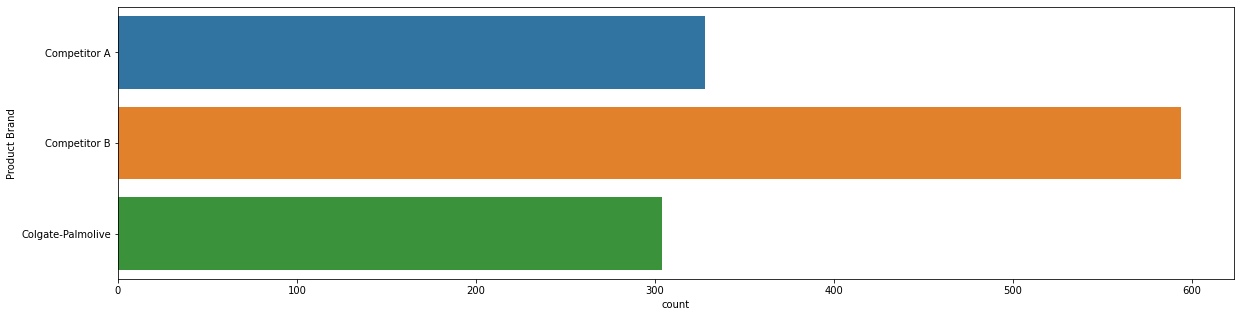

In [4]:
plt.figure(figsize=(20,5))
sns.countplot(y='Product Brand',data=data)

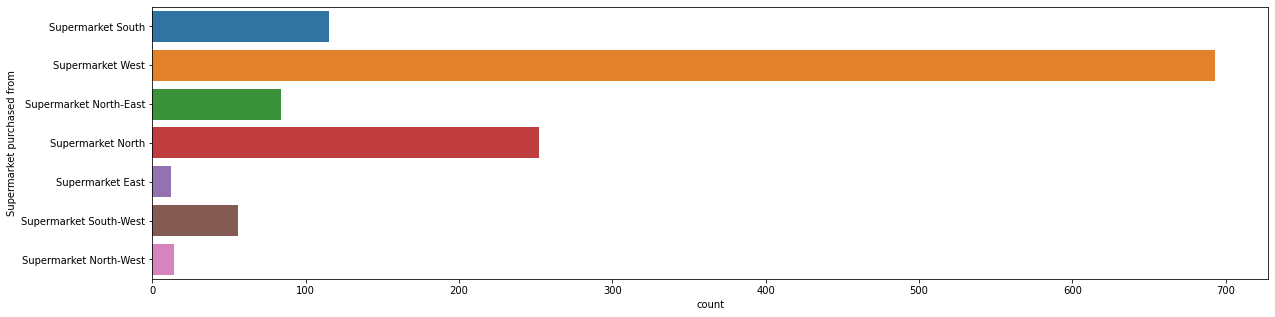

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(y='Supermarket purchased from',data=data)

It seems that product B and supermarket west had the most sales from other product, let's find out why is that happen.

Unfortunately so far my best findings are just from utilizing the PIVOT feature in MS Excel. I will share the excel file, but it will be great if I can run it through Python.

But there's some question in my head based on the basic EDA and Pivoting, I want to find which days in a month or in a week that has the most sales (based on the sales volume).

and from python, it makes a clear vision for the answer.

**FINDING THE MOST SALES DAY IN WEEKDAY**

I started by categorizing each data with their days number in a week.

0 = Monday

1 = Tuesday

2 = Wednesday

3 = Thursday

4 = Friday

5 = Saturday

6 = Sunday

In [5]:
data['Order_day'] = pd.to_datetime(data['Order date'])
data['day'] = data['Order_day'].dt.weekday
data.head()

,Order date,Product Brand,Product number,Customer ID,Order ID,Supermarket purchased from,Sales Volume,Sales Value,Order_day,day
0,9/1/2016,Competitor A,701139,9442,R1234623,Supermarket South,1,$34.50,2016-09-01,3
1,9/1/2016,Competitor B,198485,54276,R1235251,Supermarket West,3,$34.20,2016-09-01,3
2,9/1/2016,Competitor B,768644,244012,R1235150,Supermarket West,1,$61.30,2016-09-01,3
3,9/1/2016,Competitor B,369239,300346,R1235378,Supermarket North-East,1,$39.80,2016-09-01,3
4,9/1/2016,Colgate-Palmolive,899488,436689,R1234583,Supermarket North,1,$37.20,2016-09-01,3


In [6]:
dayresult = data.groupby(['day']).count()
dayresult

,Order date,Product Brand,Product number,Customer ID,Order ID,Supermarket purchased from,Sales Volume,Sales Value,Order_day
day,,,,,,,,,
0,173,173,173,173,173,173,173,173,173
1,202,202,202,202,202,202,202,202,202
2,151,151,151,151,151,151,151,151,151
3,202,202,202,202,202,202,202,202,202
4,173,173,173,173,173,173,173,173,173
5,147,147,147,147,147,147,147,147,147
6,178,178,178,178,178,178,178,178,178


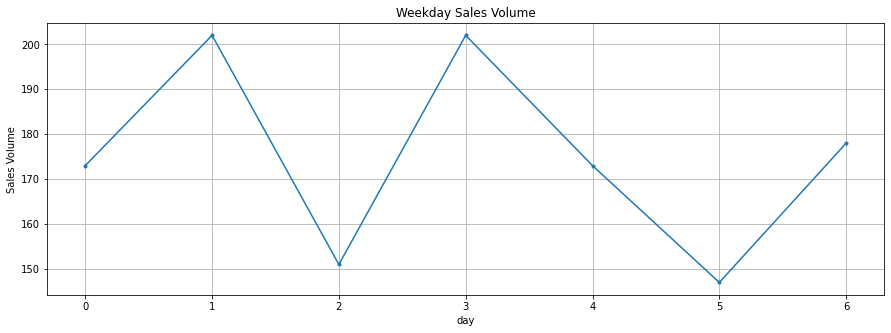

In [7]:
dayresult = data.groupby(['day'])['Sales Volume'].count()
weekday = [weekday for weekday, df in data.groupby('day')]
plt.figure(figsize=(15,5))
plt.title('Weekday Sales Volume')
plt.plot(weekday,dayresult, marker=".")
plt.xticks(weekday)
plt.xlabel('day')
plt.ylabel('Sales Volume')
plt.grid()
plt.show()

it seems that the most sales were on Tuesday and Thursday. and if we count on our cognitive bias, we assume that people will shop for their basic needs (especially cleaning products from the information) on their weekends.

I really want to know if this visualization is accurate since it will be further research if this is was actual data.

**FINDING THE MOST SALES DAY WITHIN A MONTH (31 DAYS)**

In [8]:
data['Order_day'] = pd.to_datetime(data['Order date'])
data['monthdays'] = data['Order_day'].dt.day
data.head()

,Order date,Product Brand,Product number,Customer ID,Order ID,Supermarket purchased from,Sales Volume,Sales Value,Order_day,day,monthdays
0,9/1/2016,Competitor A,701139,9442,R1234623,Supermarket South,1,$34.50,2016-09-01,3,1
1,9/1/2016,Competitor B,198485,54276,R1235251,Supermarket West,3,$34.20,2016-09-01,3,1
2,9/1/2016,Competitor B,768644,244012,R1235150,Supermarket West,1,$61.30,2016-09-01,3,1
3,9/1/2016,Competitor B,369239,300346,R1235378,Supermarket North-East,1,$39.80,2016-09-01,3,1
4,9/1/2016,Colgate-Palmolive,899488,436689,R1234583,Supermarket North,1,$37.20,2016-09-01,3,1


In [9]:
fullmonth = data.groupby(['monthdays']).count()
fullmonth.head()

,Order date,Product Brand,Product number,Customer ID,Order ID,Supermarket purchased from,Sales Volume,Sales Value,Order_day,day
monthdays,,,,,,,,,,
1,26,26,26,26,26,26,26,26,26,26
2,45,45,45,45,45,45,45,45,45,45
3,30,30,30,30,30,30,30,30,30,30
4,42,42,42,42,42,42,42,42,42,42
5,37,37,37,37,37,37,37,37,37,37


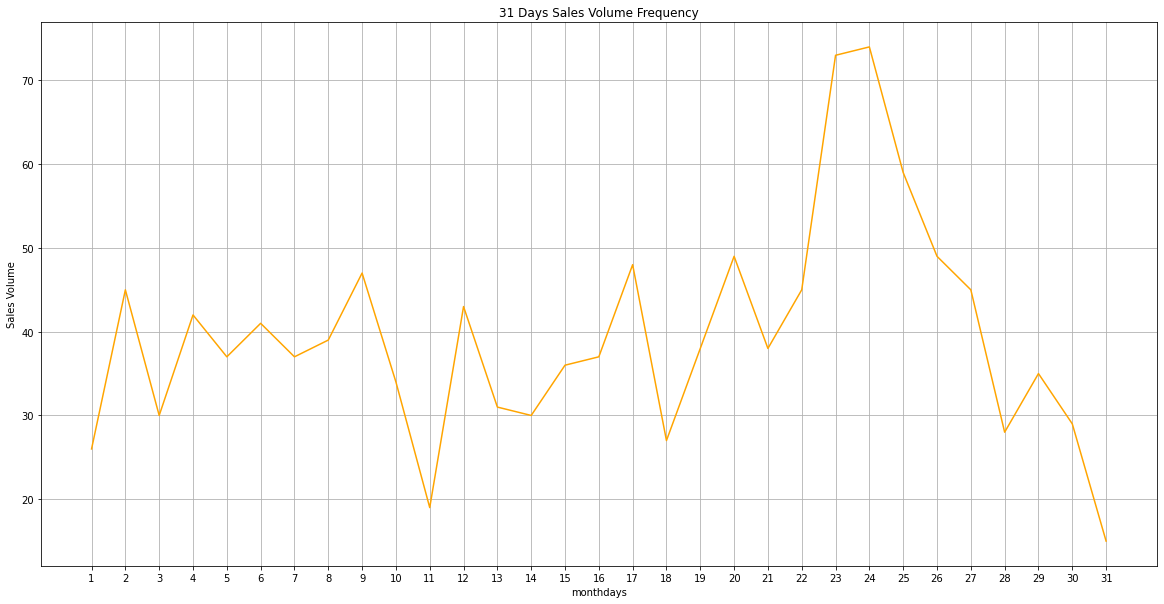

In [10]:
fullmonth = data.groupby(['monthdays'])['Sales Volume'].count()
days = [day for day, df in data.groupby('monthdays')]
plt.figure(figsize=(20,10))
plt.title('31 Days Sales Volume Frequency')
plt.plot(days,fullmonth,color="orange")
plt.xticks(days)
plt.xlabel('monthdays')
plt.ylabel('Sales Volume')
plt.grid()
plt.show()

This was also interesting. again, if we depended on our cognitive we will assume that people will shop for their basic needs right after their fresh paycheck (majorly on the first day of the month).

but the data says otherwise, it seems that people shop more at the end of the month.

why is that happening ??